### Overview

#### This notebook explores the relationship between stock price volatility and trading volume using historical market data. The analysis computes daily volatility and volume changes, visualizes their relationship, and fits mathematical models across stocks, ETFs, and cryptocurrencies.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

apple_data = pd.read_csv("Apple Stock.csv")
tesla_data = pd.read_csv("Tesla Stock.csv")
nvidia_data = pd.read_csv("Nvidia Stock.csv")


In [2]:
def prepare_data(df):
    df["Volume"] = df["Volume"].astype(str).str.replace(",", "")
    df["Volume"] = df["Volume"].astype(float)
    df["Volatility"] = (df["High"] - df["Low"]) / df["Close"]
    df["Volume_delta"] = df["Volume"].diff(periods=-1)
    df["Volatility_delta"] = df["Volatility"].diff(periods=-1)
    df["Return"] = np.log(df["Close"] / df["Close"].shift(-1))
    df["Return_delta"] = df["Return"].diff(periods=-1)
    return df

apple_data = prepare_data(apple_data)
tesla_data = prepare_data(tesla_data)
nvidia_data = prepare_data(nvidia_data)

apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta,Return,Return_delta
0,5-Dec-25,280.54,281.14,278.05,278.78,278.78,47244000.0,0.011084,3254900.0,-0.010790,-0.006864,0.005352
1,4-Dec-25,284.10,284.73,278.59,280.70,280.70,43989100.0,0.021874,450400.0,0.003151,-0.012216,-0.005062
2,3-Dec-25,286.20,288.62,283.30,284.15,284.15,43538700.0,0.018723,-10130800.0,0.002055,-0.007154,-0.018009
3,2-Dec-25,283.00,287.40,282.63,286.19,286.19,53669500.0,0.016667,7081800.0,-0.009048,0.010856,-0.004270
4,1-Dec-25,278.01,283.42,276.14,283.10,283.10,46587700.0,0.025715,26452100.0,0.014921,0.015126,0.010453


# Exploratory Data Analysis


     EDA FOR Apple DATA

 COLUMN DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1255 non-null   object 
 1   Open              1255 non-null   float64
 2   High              1255 non-null   float64
 3   Low               1255 non-null   float64
 4   Close             1255 non-null   float64
 5   Adj Close         1255 non-null   float64
 6   Volume            1255 non-null   float64
 7   Volatility        1255 non-null   float64
 8   Volume_delta      1254 non-null   float64
 9   Volatility_delta  1254 non-null   float64
 10  Return            1254 non-null   float64
 11  Return_delta      1253 non-null   float64
dtypes: float64(11), object(1)
memory usage: 117.8+ KB
None 

 DATAFRAME SHAPE:
(1255, 12) 

 NULL VALUES BEFORE FILLING:
Date                0
Open                0
High                0
L

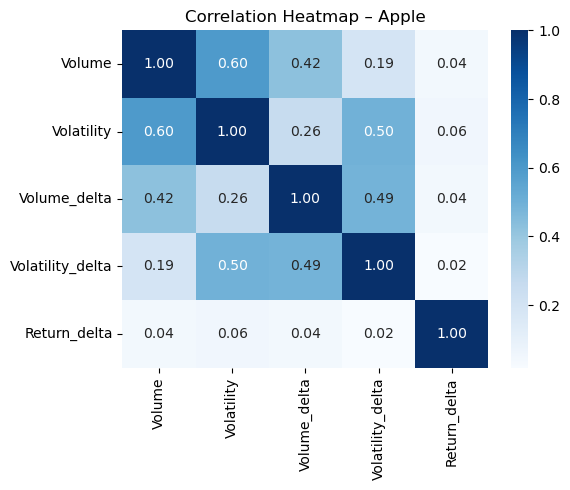

 HEATMAP GENERATED FOR: ['Volume', 'Volatility', 'Volume_delta', 'Volatility_delta', 'Return_delta']


     EDA FOR Tesla DATA

 COLUMN DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1255 non-null   object 
 1   Open              1255 non-null   float64
 2   High              1255 non-null   float64
 3   Low               1255 non-null   float64
 4   Close             1255 non-null   float64
 5   Adj Close         1255 non-null   float64
 6   Volume            1255 non-null   float64
 7   Volatility        1255 non-null   float64
 8   Volume_delta      1254 non-null   float64
 9   Volatility_delta  1254 non-null   float64
 10  Return            1254 non-null   float64
 11  Return_delta      1253 non-null   float64
dtypes: float64(11), object(1)
memory usage: 117.8+ KB
None 

 DATAFRAME SHAPE:
(1255, 

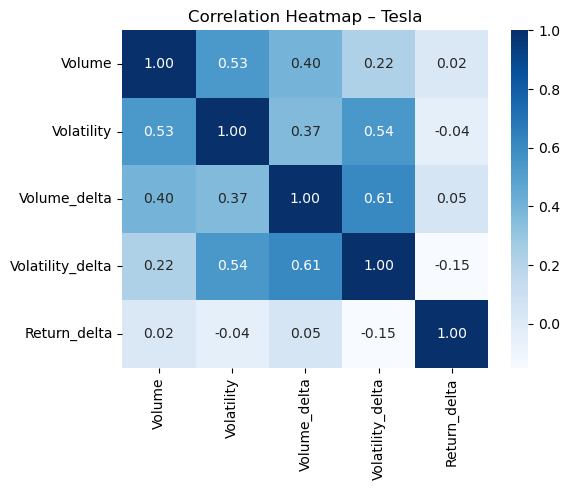

 HEATMAP GENERATED FOR: ['Volume', 'Volatility', 'Volume_delta', 'Volatility_delta', 'Return_delta']


     EDA FOR Nvidia DATA

 COLUMN DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1255 non-null   object 
 1   Open              1255 non-null   float64
 2   High              1255 non-null   float64
 3   Low               1255 non-null   float64
 4   Close             1255 non-null   float64
 5   Adj Close         1255 non-null   float64
 6   Volume            1255 non-null   float64
 7   Volatility        1255 non-null   float64
 8   Volume_delta      1254 non-null   float64
 9   Volatility_delta  1254 non-null   float64
 10  Return            1254 non-null   float64
 11  Return_delta      1253 non-null   float64
dtypes: float64(11), object(1)
memory usage: 117.8+ KB
None 

 DATAFRAME SHAPE:
(1255,

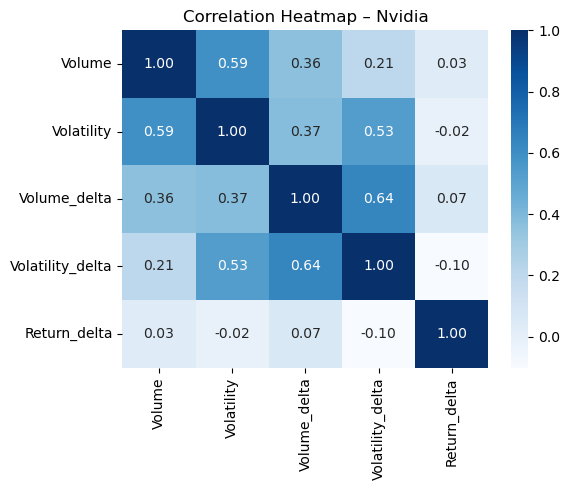

 HEATMAP GENERATED FOR: ['Volume', 'Volatility', 'Volume_delta', 'Volatility_delta', 'Return_delta']



In [3]:


def full_eda(df, name):
    print(f"\n============================")
    print(f"     EDA FOR {name} DATA")
    print(f"============================\n")
    
    # 1. Data types and memory info
    print(" COLUMN DATA TYPES:")
    print(df.info(), "\n")
    
    # 2. Shape of dataframe
    print(" DATAFRAME SHAPE:")
    print(df.shape, "\n")
    
    # 3. Missing values
    print(" NULL VALUES BEFORE FILLING:")
    print(df.isna().sum(), "\n")
    
    # 4. Statistical summary
    print(" SUMMARY STATISTICS:")
    print(df.describe, "\n")
    
    # 5. Fill NaN values with column means
    df.fillna(df.mean(numeric_only=True), inplace=True)
    
    print(" NULL VALUES AFTER FILLING:")
    print(df.isna().sum(), "\n")
    
    # 6. Correlation Heatmap for the main variables
    corr_cols = ["Volume","Volatility","Volume_delta", "Volatility_delta", "Return_delta"]
    corr_df = df[corr_cols].corr()
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_df, annot=True, cmap="Blues", fmt=".2f")
    plt.title(f"Correlation Heatmap – {name}")
    plt.tight_layout()
    plt.show()
    
    print(f" HEATMAP GENERATED FOR: {corr_cols}\n")





full_eda(apple_data, "Apple")
full_eda(tesla_data, "Tesla")
full_eda(nvidia_data, "Nvidia")


The correlation heatmap shows that none of the variables have a strong linear relationship with each other, with all correlation values well below 0.7. This suggests that the interactions between Volume_delta, Volatility_delta, and Return_delta are not linear. 

# Volume_delta Vs Volatility_delta


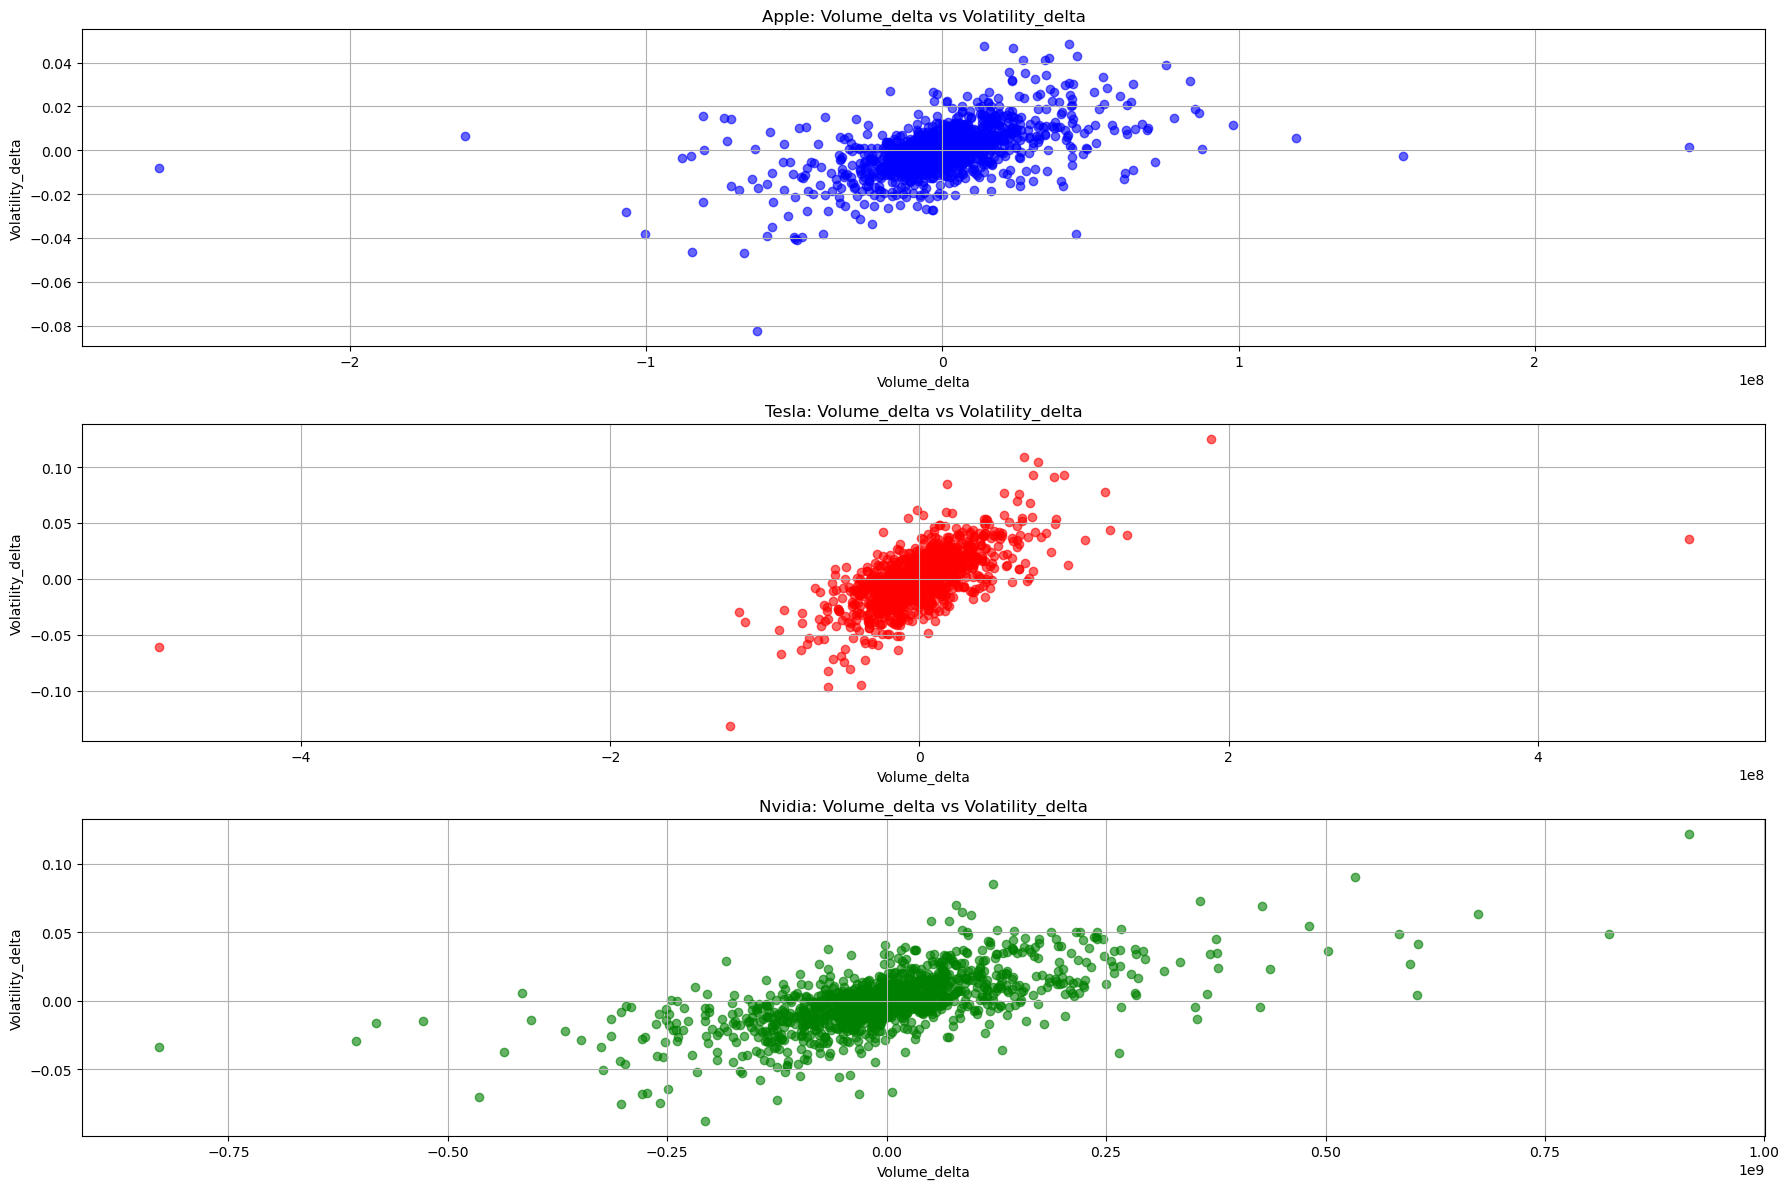

In [4]:
plt.figure(figsize=(18, 12))

# --- 1. APPLE ---
plt.subplot(3, 1, 1)
plt.scatter(apple_data["Volume_delta"], apple_data["Volatility_delta"], alpha=0.6, color="blue")
plt.xlabel("Volume_delta")
plt.ylabel("Volatility_delta")
plt.title("Apple: Volume_delta vs Volatility_delta")
plt.grid(True)

# --- 2. TESLA ---
plt.subplot(3, 1, 2)
plt.scatter(tesla_data["Volume_delta"], tesla_data["Volatility_delta"], alpha=0.6, color="red")
plt.xlabel("Volume_delta")
plt.ylabel("Volatility_delta")
plt.title("Tesla: Volume_delta vs Volatility_delta")
plt.grid(True)

# --- 3. NVIDIA ---
plt.subplot(3, 1, 3)
plt.scatter(nvidia_data["Volume_delta"], nvidia_data["Volatility_delta"], alpha=0.6, color="green")
plt.xlabel("Volume_delta")
plt.ylabel("Volatility_delta")
plt.title("Nvidia: Volume_delta vs Volatility_delta")
plt.grid(True)

plt.tight_layout()
plt.show()


# Volume_delta Vs Return_delta


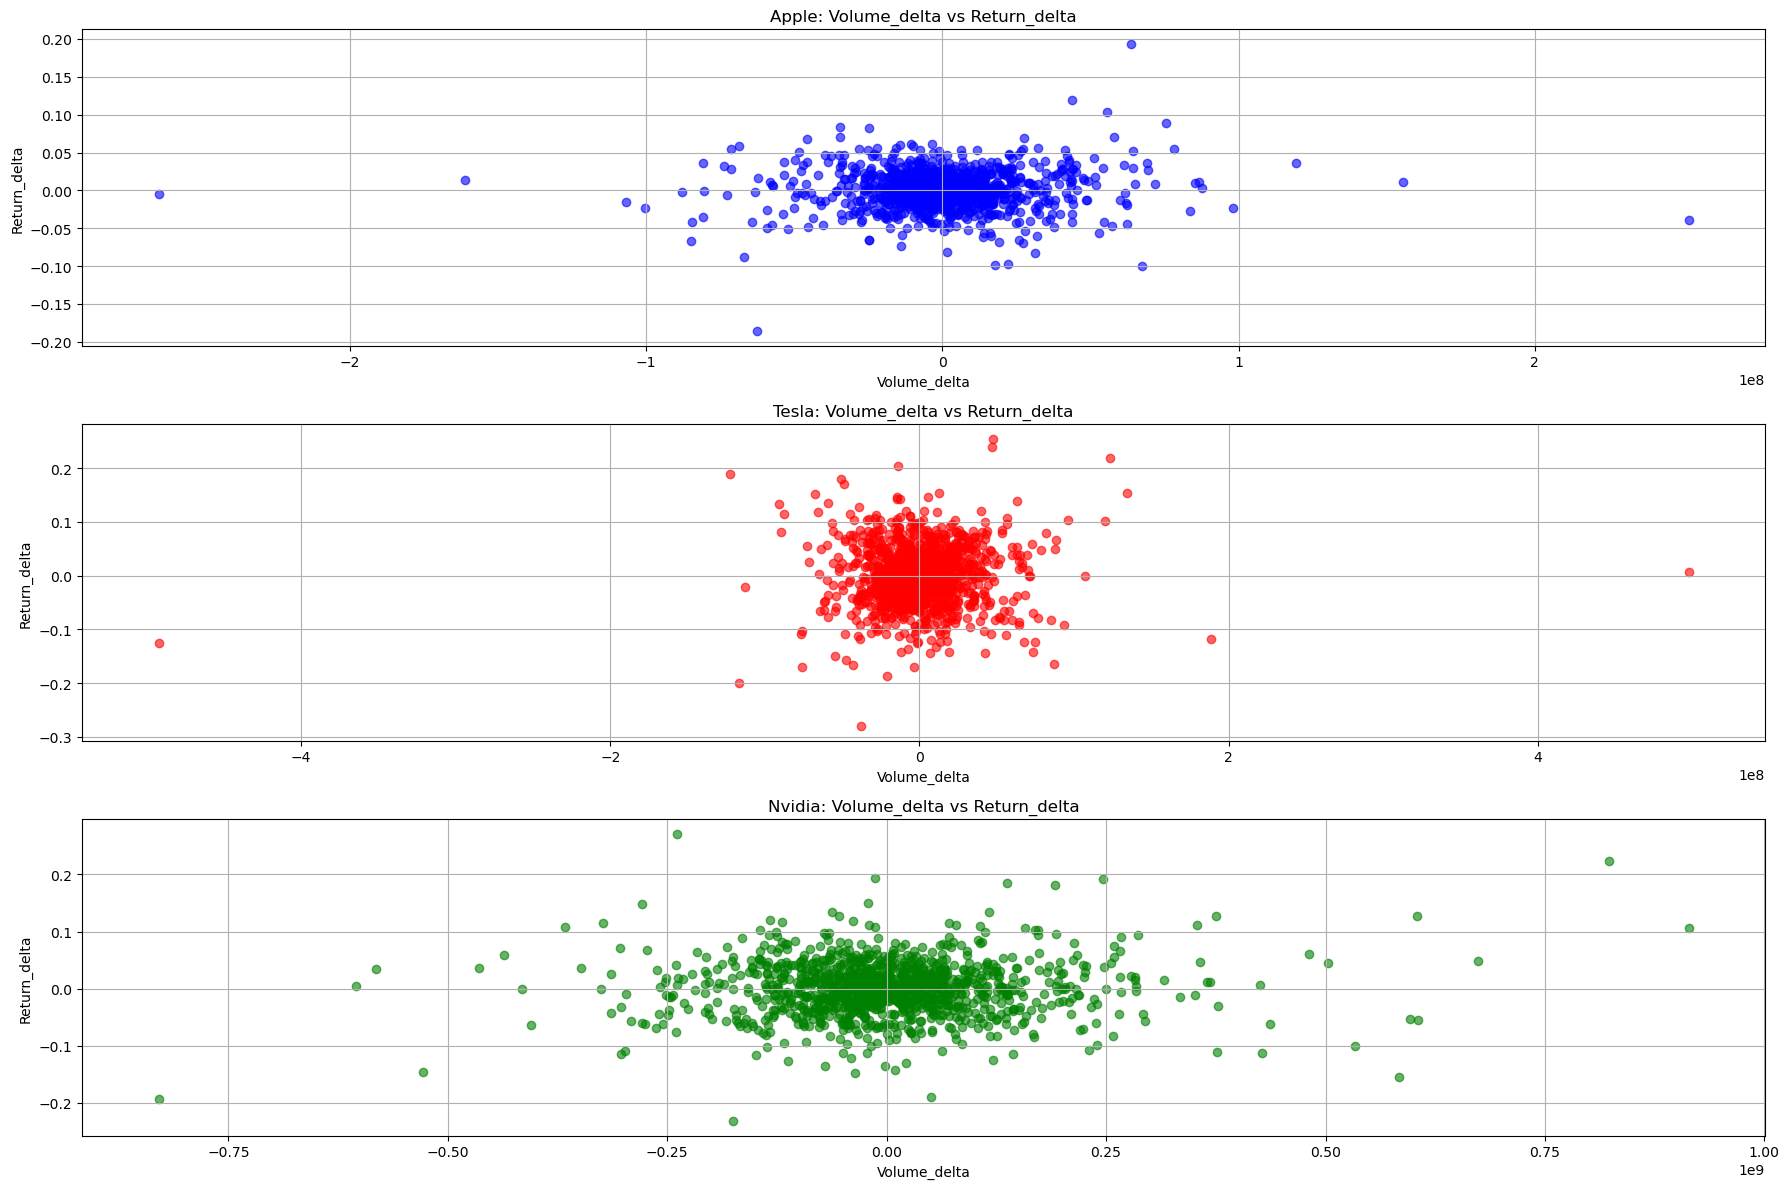

In [5]:
plt.figure(figsize=(18, 12))

# --- 1. APPLE ---
plt.subplot(3, 1, 1)
plt.scatter(apple_data["Volume_delta"], apple_data["Return_delta"], alpha=0.6, color="blue")
plt.xlabel("Volume_delta")
plt.ylabel("Return_delta")
plt.title("Apple: Volume_delta vs Return_delta")
plt.grid(True)

# --- 2. TESLA ---
plt.subplot(3, 1, 2)
plt.scatter(tesla_data["Volume_delta"], tesla_data["Return_delta"], alpha=0.6, color="red")
plt.xlabel("Volume_delta")
plt.ylabel("Return_delta")
plt.title("Tesla: Volume_delta vs Return_delta")
plt.grid(True)

# --- 3. NVIDIA ---
plt.subplot(3, 1, 3)
plt.scatter(nvidia_data["Volume_delta"], nvidia_data["Return_delta"], alpha=0.6, color="green")
plt.xlabel("Volume_delta")
plt.ylabel("Return_delta")
plt.title("Nvidia: Volume_delta vs Return_delta")
plt.grid(True)

plt.tight_layout()
plt.show()


The scatter plots further reinforce the correlation results: neither Volume_delta vs. Volatility_delta nor Volume_delta vs. Return_delta shows a clear linear trend, with the points widely dispersed across the plot. This indicates that the relationship does not follow a straight-line pattern. Together with the low correlation values, this confirms that a simple linear model would not adequately capture the underlying behavior, and a non-linear approach is more appropriate for modeling the relationship between volatility and volume.

In [6]:


def compare_models(df, name):
    
    clean = df.dropna(subset=["Volume", "Volatility"])
    X = clean["Volume"].values.reshape(-1, 1)
    y = clean["Volatility"].values

    results = {}

    # ---------- 1. Polynomial Degree 2 ----------
    poly2 = PolynomialFeatures(degree=2)
    X2 = poly2.fit_transform(X)
    model2 = LinearRegression().fit(X2, y)
    y2 = model2.predict(X2)
    coef = model2.coef_
    results["Polynomial_2"] = {
        "Equation": f"σ = {coef[2]:.12f}·V² + {coef[1]:.12f}·V + {model2.intercept_:.12f}",
        "R2": r2_score(y, y2),
        "RMSE": np.sqrt(mean_squared_error(y, y2))
    }

    # ---------- 2. Polynomial Degree 3 ----------
    poly3 = PolynomialFeatures(degree=3)
    X3 = poly3.fit_transform(X)
    model3 = LinearRegression().fit(X3, y)
    y3 = model3.predict(X3)
    coef = model3.coef_
    results["Polynomial_3"] = {
        "Equation": f"σ = {coef[3]:.12f}·V³ + {coef[2]:.12f}·V² + {coef[1]:.12f}·V + {model3.intercept_:.12f}",
        "R2": r2_score(y, y3),
        "RMSE": np.sqrt(mean_squared_error(y, y3))
    }

    # ---------- 3. Logarithmic Model ----------
    logX = np.log(X, where=(X>0))  # safe log
    log_model = LinearRegression().fit(logX, y)
    ylog = log_model.predict(logX)
    results["Logarithmic"] = {
        "Equation": f"σ = {log_model.coef_[0]:.8f}·ln(V) + {log_model.intercept_:.8f}",
        "R2": r2_score(y, ylog),
        "RMSE": np.sqrt(mean_squared_error(y, ylog))
    }

    print(f"\nMODEL RESULTS FOR {name}:\n")
    for model, metrics in results.items():
        print(model)
        print(" Equation:", metrics["Equation"])
        print(" R²:", round(metrics["R2"], 6))
        print(" RMSE:", round(metrics["RMSE"], 6))
        print()

    return results


all_results = {}

all_results["Apple"] = compare_models(apple_data, "Apple")
all_results["Tesla"] = compare_models(tesla_data, "Tesla")
all_results["Nvidia"] = compare_models(nvidia_data, "Nvidia")



MODEL RESULTS FOR Apple:

Polynomial_2
 Equation: σ = -0.000000000000·V² + 0.000000000340·V + 0.000559211579
 R²: 0.365875
 RMSE: 0.009193

Polynomial_3
 Equation: σ = -0.000000000000·V³ + 0.000000000000·V² + 0.000000000000·V + 0.010761389624
 R²: 0.38192
 RMSE: 0.009076

Logarithmic
 Equation: σ = 0.01749963·ln(V) + -0.29374135
 R²: 0.342193
 RMSE: 0.009363


MODEL RESULTS FOR Tesla:

Polynomial_2
 Equation: σ = -0.000000000000·V² + 0.000000000381·V + 0.011302873871
 R²: 0.29948
 RMSE: 0.018292

Polynomial_3
 Equation: σ = -0.000000000000·V³ + 0.000000000000·V² + -0.000000000000·V + 0.029559554814
 R²: 0.301941
 RMSE: 0.018259

Logarithmic
 Equation: σ = 0.03080111·ln(V) + -0.51966220
 R²: 0.287134
 RMSE: 0.018452


MODEL RESULTS FOR Nvidia:

Polynomial_2
 Equation: σ = -0.000000000000·V² + 0.000000000068·V + 0.012239246284
 R²: 0.352812
 RMSE: 0.015728

Polynomial_3
 Equation: σ = -0.000000000000·V³ + 0.000000000000·V² + -0.000000000000·V + 0.022201290716
 R²: 0.35422
 RMSE: 0.01571

---
# 1. General Equation Formats (Using X and Y)

### Quadratic Polynomial Model
\[
Y = a_1 X + a_0
\]

### Cubic Polynomial Model
\[
Y = a_0
\]

### Logarithmic Model
\[
Y = a \ln(X) + b
\]

---

# 2. Actual Fitted Equations for Each Stock


---

## Apple (AAPL)

### Quadratic Polynomial Model
\[
Y = 3.40 * 10^{-10} X + 5.5921 * 10^{-4}
\]

### Cubic Polynomial Model
\[
Y = 1.0761 * 10^{-2}
\]

### Logarithmic Model
\[
Y = 0.01750 \ln(X) - 0.29374
\]

---

## Tesla (TSLA)

### Quadratic Polynomial Model
\[
Y = 3.81 * 10^{-10} X + 1.1303 * 10^{-2}
\]

### Cubic Polynomial Model
\[
Y = 2.9559 * 10^{-2}
\]

### Logarithmic Model
\[
Y = 0.03080 \ln(X) - 0.51966
\]

---

## Nvidia (NVDA)

### Quadratic Polynomial Model
\[
Y = 6.80 * 10^{-11} X + 1.2239 * 10^{-2}
\]

### Cubic Polynomial Model
\[
Y = 2.2201 * 10^{-2}
\]

### Logarithmic Model
\[
Y = 0.02355 \ln(X) - 0.42520
\]

---


#### Across all three stocks, the cubic polynomial model provided the strongest overall performance when describing how volatility changes with trading volume. Apple fits the model the best, showing the highest R2 scores and the lowest prediction error. This indicates that Apple’s volatility behaves more consistently with respect to its trading volume, likely because the stock has high liquidity and more stable trading patterns. In other words, when Apple’s volume changes, its volatility responds in a way that our model can capture more reliably.


#### Tesla fits the model the worst, as its volatility is influenced by many factors beyond just volume—such as sentiment-driven spikes, major news events, and highly speculative trading behavior. These external influences make Tesla’s price movements harder for a simple mathematical equation to capture. 

#### Nvidia falls in between, with a moderate relationship that the model can describe reasonably well but not as clearly as Apple. 

#### Overall, while the non-linear model works well for identifying the general pattern, the strength of the relationship between volume and volatility varies noticeably across the three stocks.
---



---

# Step 3:

Extend to ETFs or cryptocurrencies.

Examples: SPY, QQQ, BTC-USD, ETH-USD.

Analyze whether your equation works for these assets.

### Taking bitcoin dataset

---

In [7]:
bitcoin_data=pd.read_csv("Bitcoin.csv")
print (bitcoin_data.info())
bitcoin_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   Open       1825 non-null   float64
 2   High       1825 non-null   float64
 3   Low        1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Adj Close  1825 non-null   float64
 6   Volume     1825 non-null   object 
dtypes: float64(5), object(2)
memory usage: 99.9+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,8-Dec-25,90424.59,92267.12,89644.89,90640.20,90640.20,"57,394,099,056"
1,7-Dec-25,89277.81,91740.84,87799.56,90405.64,90405.64,"47,394,898,960"
2,6-Dec-25,89389.36,90267.46,88951.66,89272.38,89272.38,"37,994,042,405"
3,5-Dec-25,92133.65,92702.64,88152.14,89387.76,89387.76,"63,256,398,633"
4,4-Dec-25,93454.26,94038.24,90976.10,92141.63,92141.63,"64,538,402,681"


In [8]:
#Using the same functions create above to prepare the data

bitcoin_data = prepare_data(bitcoin_data)
all_results["Bitcoin"]=compare_models(bitcoin_data, "Bitcoin")
all_results["Bitcoin"]


MODEL RESULTS FOR Bitcoin:

Polynomial_2
 Equation: σ = -0.000000000000·V² + 0.000000000001·V + 0.010635566452
 R²: 0.285245
 RMSE: 0.025383

Polynomial_3
 Equation: σ = -0.000000000000·V³ + 0.000000000000·V² + -0.000000000000·V + 0.028911548768
 R²: 0.248336
 RMSE: 0.026031

Logarithmic
 Equation: σ = 0.02753614·ln(V) + -0.62348254
 R²: 0.284334
 RMSE: 0.0254



{'Polynomial_2': {'Equation': 'σ = -0.000000000000·V² + 0.000000000001·V + 0.010635566452',
  'R2': 0.2852448600747247,
  'RMSE': np.float64(0.02538339357054067)},
 'Polynomial_3': {'Equation': 'σ = -0.000000000000·V³ + 0.000000000000·V² + -0.000000000000·V + 0.028911548768',
  'R2': 0.24833649528416235,
  'RMSE': np.float64(0.026030515708927216)},
 'Logarithmic': {'Equation': 'σ = 0.02753614·ln(V) + -0.62348254',
  'R2': 0.2843335157342991,
  'RMSE': np.float64(0.025399570888879532)}}

---

When I extended the same volatility–volume equations to Bitcoin, the models performed noticeably worse than they did for individual stocks. The R² values for Bitcoin were much lower and the RMSE was significantly higher, showing that trading volume explains only a small portion of Bitcoin’s volatility. This makes sense because Bitcoin trades 24/7 and is far more influenced by global sentiment, news events, and speculative activity than by volume alone. Overall, the equations that worked reasonably well for stocks do not generalize effectively to Bitcoin, highlighting the fundamental differences between equity markets and cryptocurrencies.

---